# How to:
## Visuzlize Jackknifed Measurement Sets
Here, we quickly show the noise realziations and how they differ from the original ones. We have build-in some tools for visualization if you want to use them. But, all the outputs are fits files and measurement sets, so you simply use your own scripts on the outputs.

In [1]:
import jacked

Just getting the same initialization as the previous setup

In [2]:
#initilaize
tool = jacked.Jack(fname   = '../data/Glass-z13.ms', # The file name of the visibilities, 
                   outdir  = '../output/', #the directory to save the outputs in
                   fields  = ['3'], # Each visibility can have multiple fields, 
                   spws    = [['0']], # and each field can have multiple spws,
                   band    = 'Band7', # Band of the observation,
                   array   = 'C7', # which configuration the observation are taken in,
                   )

### Input data

`tool.run(fname)` from the previous notebook runs the entire `jacked` pipeline. However, we can just call submodules to image the input data seperately. So let's image the original data set the same way as we do for the Jackknifed, to get a feel for the data

In [3]:
# tool.clean( '../data/Glass-z13.ms', reffreq = '254.35GHz')
tool.outfile = '../output/cubes/Glass-z13.im'

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


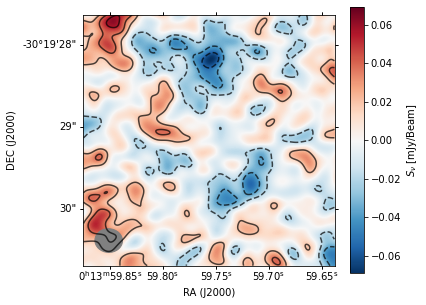

In [4]:
tool.plot_map(savedir = '../plots/', moment = 'continuum')

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


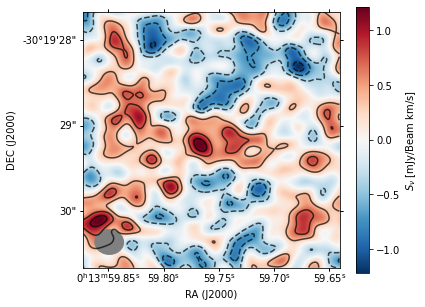

In [5]:
tool.plot_map(savedir = '../plots/', moment = 'moment-0', channels = [13,23], box_size_arcsec=3, center_coord=(3.498985, -30.324767))

In [ ]:
tool.plot_slp(savedir = '../plots/', size = 3/2.355)

 48%|████▊     | 29/60 [03:15<03:16,  6.34s/it]

Plotting the spectral line profile might take a while. That is because we bootstrap the aperture we extract the flux from through each channel map. Doing this ensures we take into account the correlated spatial niose in the image data. The defeault is an extraction through at the center of the cube the size of the beam (at FWHM). You can make the aperture large with the `size` variable or move the aperture mask around by giving the central coordinate to the `tool.plot_slp()` module.

## Jacked version
Since we already jackknifed the data previously, we just need to change the `tool.outfile` to navigate to a jackknifed cube. If you haven't jacked knife the data yet, just run `tool.run(seed =  42)`, `tool.outfile` will automatically be updated. Now here are the results 

In [ ]:
tool.outfile = '../output/cubes/Glass-z13_Jacked_seed42.im'

In [ ]:
tool.plot_map(savedir = '../plots/', moment = 'continuum')

In [ ]:
tool.plot_map(savedir = '../plots/', moment = 'moment-0', channels = [13,23], box_size_arcsec=3, center_coord=(3.498985, -30.324767))

In [ ]:
tool.plot_slp(savedir = '../plots/', size = 3/2.355)